In [5]:
import functions.add_path

import functions.plotnine_theme
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import *

import functions.et_condition_df as condition_df
import functions.et_make_df as  make_df
import be_load

In [6]:
import os
print(os.getcwd())
if os.getcwd()[-4:] != 'code':
    try:
        os.chdir('./code')
    except:
        os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code')


/net/store/nbp/users/behinger/projects/etcomp/lib/pupil/pupil_src/shared_modules/calibration_routines/optimization_calibration


In [7]:
import functions.et_import as et_import
import scipy
import scipy.stats
import numpy as np


In [13]:
def pl_fix_timelag(pl):
    t_cam = np.asarray([p['recent_frame_timestamp'] for p in pl['notifications'] if p['subject']=='trigger'])# camera time
    t_msg = np.asarray([p['timestamp'] for p in pl['notifications'] if p['subject']=='trigger']) # msg time
    #slope, intercept, r_value, p_value, std_err  = scipy.stats.linregress(t_msg,t_cam) # predict camera time based on msg time
    slope,intercept,low,high = scipy.stats.theilslopes(t_cam,t_msg)
    t_fixed_msg = slope*t_msg + intercept
    print("lag found (at t=0) of :%.16fms, slope of %.16f"%(intercept,slope))
    return(t_fixed_msg)

lag found (at t=0) of :15.0431047803722322ms, slope of 0.9999555986612232


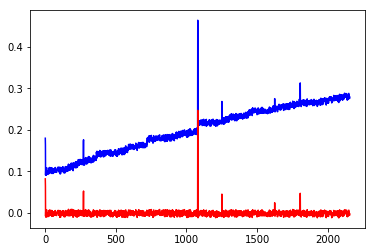

In [14]:
# Load all subjects and plot them (5 / 15 show drift!)
for ix,subject in enumerate([3]):
    try:
        pl = et_import.raw_pl_data(subject="VP%i"%(subject))
        t_msg = np.asarray([p['timestamp'] for p in pl['notifications'] if p['subject']=='trigger']) # msg time
        t_cam = np.asarray([p['recent_frame_timestamp'] for p in pl['notifications'] if p['subject']=='trigger'])
        newtime = pl_fix_timelag(pl)
        plt.figure(ix)
        plt.plot(t_msg-t_cam,'b')
        plt.plot(newtime-t_cam,'r')
    except:
        print('subject %i not successful'%(subject))
    

In [8]:
#Load one subject to fix drift, write function, apply to all msgs
subject=
pl = et_import.raw_pl_data(subject="VP%i"%(subject))